In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pysd
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.cm as cm
import pandas as pd

In [3]:
# Load model and data
variable_to_plot = 'Teacup Temperature'
csv_values = pd.read_csv('exampleValues.csv')
initial_values = csv_values[csv_values['Var Values'].notna()]['Var Values'].to_list()
model = pysd.read_vensim("modelpath.mdl")

In [4]:
# Voxel functions
def get_values(variable, list_initial_values, model_path):
    """Get final variable values"""
    final_values = []
    for initial_value in list_initial_values: 
        res = model_path.run(initial_condition=(0, {variable: initial_value}), return_columns=[variable])   
        final_value = res[variable].iloc[-1]        
        final_values.append(final_value)
    return final_values

def map_value_to_color(value):
    """Map a normalized value to a color."""
    if value <= 0.4:
        return (1, 0, 0)  # Red
    elif value <= 0.7:
        return (1, 1, 0)  # Yellow
    else:
        return (0, 1, 0)  # Green

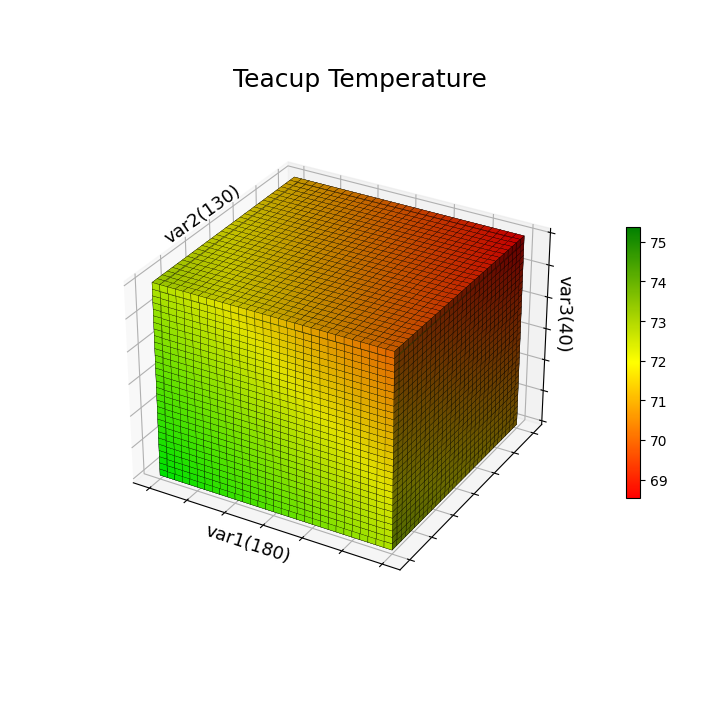

In [5]:
# Plotting configuration

# Run model to get final values and normalizing them
final_values = get_values(variable_to_plot, initial_values, model)
min_value, max_value = min(final_values), max(final_values)

# Custom colormap
colors = []
for value in final_values:
    normalized_value = (value - min_value) / (max_value - min_value)
    colors.append(map_value_to_color(normalized_value))

cmap_name = "custom_graduated_heatmap"
custom_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=256)

# Plotting configuration
axes = [30, 30, 30]
data = np.ones(axes, dtype=np.float32)
x, y, z = np.meshgrid(np.linspace(0, 3, axes[0]),
                      np.linspace(0, 5, axes[1]),
                      np.linspace(0, 5, axes[2]))
heatmap_data = x + y + z
heatmap_normalized = (heatmap_data - heatmap_data.min()) / (heatmap_data.max() - heatmap_data.min())
colors = custom_cmap(heatmap_normalized)

# 3D Plotting
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
voxels = ax.voxels(data, facecolors=colors, alpha=1, edgecolor='k', linewidth=0.2)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])

# 2D Plotting
ax2d = fig.add_axes([0, 0, 1, 1], frameon=False)
ax2d.set_xticks([])
ax2d.set_yticks([])
ax2d.text(0.5, 0.9, f'{variable_to_plot}', fontsize=18, fontweight='normal', ha='center', va='center')
ax2d.text(0.34, 0.205, f'var1({initial_values[0]})', ha="center", va="bottom", fontsize=13, rotation=-18.2)
ax2d.text(0.275, 0.66, f'var2({initial_values[1]})', ha="center", va="bottom", fontsize=13, rotation=35)
ax2d.text(0.79, 0.51, f'var3({initial_values[2]})', ha="center", va="bottom", fontsize=13, rotation=268.5)

# Colorbar
cmap_name_for_colorbar = "colorbar_heatmap"
colors_for_colorbar = [(0, 'red'), (0.5, 'yellow'), (1, 'green')]
colorbar_cmap = LinearSegmentedColormap.from_list(cmap_name_for_colorbar, colors_for_colorbar)
sm = cm.ScalarMappable(cmap=colorbar_cmap, norm=plt.Normalize(vmin=min_value, vmax=max_value))
sm.set_array([])
fig.colorbar(sm, ax=ax, orientation='vertical', fraction=0.025, pad=0.1)


plt.show()